# Discussion Questions

Let's discuss some issues about the past election from the perspective of data science.

---

Polling is a popular method to measure public opinion, especially with respect to political candidates. However, polling data can be biased in many ways. A famous example of a polling mistake occured around the 1936 U.S. election(https://en.wikipedia.org/wiki/1936_United_States_presidential_election): the Literary Digest, an influential magazine which had correctly predicted the previous five elections, predicted that Republican candidate Alf Landon would defeat Democratic candidate Franklin D. Roosevelt in a landslide. In the end, Roosevelt won all states expect ME and VT. 

How did the Literary Digest make such a big mistake? A convincing hypothesis is that their sampling method was biased: they polled their own readers, people found in vehicle registration lists, and telephone owners. These features correlate with wealth, and weathly individuals at the time were not happy with Roosevelt's "New Deal". Other studies suggest(https://en.wikipedia.org/wiki/The_Literary_Digest) that non-response bias was the main reason for the misleading poll results: people who disliked Roosevelt were more likely to respond the survey.

**What other factors do you think may affect the accuracy of poll in general?**

---

You likely saw a lot of "exit poll" data covered in news reports on election day. An election exit poll is a poll of voters taken immediately after they have exited the polling stations ([more info here](https://en.wikipedia.org/wiki/Exit_poll)).

**What advantages do you think exit polls have compared with to other election-related polls? What biases do you think exist in exit polls?**

---

Many institutions make predications about elections based on polling data (eg. [FiveThirtyEight](https://projects.fivethirtyeight.com/2020-election-forecast/) and [The Economist](https://projects.economist.com/us-2020-forecast/president)). They may use phrases  like "Candidate A has a 40% chance of winning, and candidate B has a 60% chance of winning" or "The likelihood of Candidate A winning is 2 in 5, and the likelihood of candidate B's winning is 3 in 5".

**How do you understand these statements? Is the winner already determined by these polls?**

---

Many predictions will give a range of likely election results, because sampled pre-election data can never perfectly predict the full result of an election. 

**What factors do you think may contribute to the difference between poll-based predictions and the real election results?**

### **Note:** You do NOT need to include answers to the above questions in your homework submission. They are for in-section discussion only.

# Homework 6



In [91]:
%matplotlib inline
## import libraries
import numpy
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

---

## Problem 1 (6 pts)

We will explore the relationship between the price of a diamond and its properties (e.g. color, carat weight). A description of these features can be found [here](https://www.kaggle.com/shivam2503/diamonds), while a glossary of diamond-related terms can be found [here](https://www.lumeradiamonds.com/diamond-education/glossary).

Load `diamonds.csv` using `pandas` into a variable called `diamonds`. Use the `.head()` method to display the dataset's columns and first five rows. What features do you think will be correlated with the price of diamonds? Do you believe a linear model is a suitable choice for any of these features? Justify your answer.

---

In [92]:
diamonds = pd.read_csv("diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


I think that caract cut will be correlated with price, and I believe that carat will be linearly correlated with price. I am not exactly sure about how pricing of diamonds work, but I think that carat should probably be the best indicator of how much a diamond is worth because it is the weight so as weight goes up, price should go up in a linear manner.

---

## Problem 2 (2 pts)

Linear regression requires all variables to be numeric, but the values for several features in this dataset are strings.

One way to deal with this issue is to create an *indicator variable*. An indicator variable simply indicates whether or not an observation is in a category. The variable is equal to 1 if the observation is in the category, and 0 if not. 

Use the `pandas.get_dummies()` function(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) on *just* the `cut` column and display the first few rows of this result. Do **not** modify the `diamonds` object with this new data frame, we are going to do this another way in the next problem.

(*Confidence check: you will get a new dataframe with five indicator variables; one for each cut category.*)

---

In [93]:
pd.get_dummies(diamonds["cut"]).head()

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


---

## Problem 3 (4 pts)

Another way is to map these strings to a predefined set of numeric values. This method works well when there is a natural ordering to the categories, that we can reflect in the numeric values.

Use the [`.map()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) along with the dictionaries defined below to change the string values in the `cut`, `color` and `clarity` columns to numeric values. Update the `diamonds` dataframe with these new columns (overwrite the old columns containing strings). 

Next, create a new feature, `volume`, based on the `x`, `y`, and `z` dimensions in the data.

$$Volume = x*y*z$$

Compute the volume of each diamond and store the result in a new column named `volume` in the `diamonds` dataframe.

Use `.head()` to display the first five rows of new diamond dataset.

---

In [94]:
## All of these are ordered from worst to best
cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_map = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}
clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

diamonds["cut"] = diamonds["cut"].map(cut_map)
diamonds["color"] = diamonds["color"].map(color_map)
diamonds["clarity"] = diamonds["clarity"].map(clarity_map)


diamonds["volume"] = diamonds["x"]* diamonds["y"]* diamonds["z"]

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


---

## Problem 4 (6 pts)

For each of the features `carat`, `cut`, `color`, `clarity`, and `volume`, use `LinearRegression` in `sklearn.linear_model` to train a model that predicts `price` given the specified feature. (That is, perform five different single linear regressions, where `price` is always the output variable, and the input feature is one of `carat`, `cut`, `color`, `clarity`, or `volume`.) In each case, print the name of the predictor variable, followed by the regression slope and $r^2$ for that variable. Be sure to print your results with informative labels and using numbers rounded to two decimal places.

*Hint: a "for" loop will make your howework easier here.*

---

In [113]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import r2_score

linear_model = lr()

features = ["carat", "cut", "color", "clarity", "volume"]

carat = []
arrayx = []
for n in diamonds["carat"]:
    arrayx.append(n)
    carat.append(arrayx)
    arrayx = []

cut = []
arrayx = []
for n in diamonds["cut"]:
    arrayx.append(n)
    cut.append(arrayx)
    arrayx = []
    
color = []
arrayx = []
for n in diamonds["color"]:
    arrayx.append(n)
    color.append(arrayx)
    arrayx = []

clarity = []
arrayx = []
for n in diamonds["clarity"]:
    arrayx.append(n)
    clarity.append(arrayx)
    arrayx = []

volume = []
arrayx = []
for n in diamonds["volume"]:
    arrayx.append(n)
    volume.append(arrayx)
    arrayx = []

featuresarray = [carat, cut, color, clarity, volume]
for n in range(len(features)):
    linear_model.fit(featuresarray[n], diamonds["price"])
    print("feature: ", features[n])
    print('slope: ',round(linear_model.coef_[0],2))
    print(round(r2_score(diamonds["price"], linear_model.predict(featuresarray[n])),2))
    print("\n")


feature:  carat
slope:  7756.43
0.85


feature:  cut
slope:  -191.11
0.0


feature:  color
slope:  -404.57
0.03


feature:  clarity
slope:  -355.56
0.02


feature:  volume
slope:  46.01
0.81




---

## Problem 5 (3 pts)

For each of the models you trained in problem 4, interpret the resulting regression slope (i.e. what does this coefficient imply about how changes in the variable relate to changes in price?). 



---

For carat, our coefficient indicates that carat is a good indicator of changes in price based on a linear model therefore our slope of 7756 tells us that for increases in carat, there is a large increase in price. For volume, our coefficent is almost as strong as carat, the slope tells us that for each increase in volume, there is a 46 point increase in price. For cut, color, and clarity our coefficient indicates that they are not good indicators of changes in price based on our linear model because our $r^2$  is so small and close to 0, meaning that most of our data does not fit our regression line very well, therefore our slope tells us little about the relationship between the variables. However, for color, our slope tells us that color is negatively correlated with price, therefore as color increases, price decreases. This is the same for clarity -- as clarity increases, price decreases. And finally, this relationship is also seen in cut -- as cut increases, price decreases (however cut is our lowest $r^2$ valuye) 

---

## Problem 6 (8 pts)

Train a multivariable linear regression model that uses four of the five inputs jointly to predict diamond price. Print the coefficients for each predictor and the $r^2$ score of the model.

Explain how you decided which of the potential predictor variables to exclude.

---

In [106]:
multi_model = LinearRegression()
multi_model.fit(diamonds[['cut','carat', 'color', 'clarity',]], diamonds['price'])

r2 = multi_model.score(diamonds[['cut', 'carat', 'color', 'clarity']], diamonds['price'])
print('diamonds, carat coefficient:', multi_model.coef_[0])
print('diamonds, cut coefficient:', multi_model.coef_[1])
print('diamonds, color coefficient:', multi_model.coef_[2])
print('diamonds, clarity coefficient:', multi_model.coef_[3])
print('r2: ', r2)

diamonds, carat coefficient: 155.69989608688678
diamonds, cut coefficient: 8783.771786486424
diamonds, color coefficient: 319.6726974650187
diamonds, clarity coefficient: 524.8434700135434
r2:  0.9041686033395894


I chose to exclude volume because the r^2 was so close to carat, but carat was closer to a value of one.

---

## Problem 7 (4 pts)

Compare the regression slopes from the four single linear regressions performed in problem 4 to the regression slopes from the multivariable regression performed in problem 6. What has changed between the regressions in the two problems? Do you find any of these changes surprising?

Compare the $r^2$ values from problems 4 and 6. Based on these results, which model do you believe predicts diamond price most accurately? 

---

The slope for carat decreased by a factor of about 50, the slope for cut increased by a factor of about 45, color changed from a negative slope to a positive slope but only deccreased in magnitude by around 80, clarity also changed signs but its magnitude only increased by a factor of about 150. I do find the huge changes in magnitude from carat and color surprising. 

The $r^2$ value for the multivaraible linear regression model is much stronger and greater than even individual $r^2$ models from any of the variables compared. Therefore, I believe that the multivariable model predicts diamond price most accurately.


---

## Problem 8 (2 pts)

Let's explore another dataset. Load `Fish.csv` using `pandas` into a variable called `fish`. Identify the species whose individuals are lightest on average. You may find it helpful to refer to the [data description](https://www.kaggle.com/aungpyaeap/fish-market).

---

In [97]:
fish = pd.read_csv("fish.csv")
# fish.head()
fish.groupby("Species")["Weight"].mean()

Species
Bream        617.828571
Parkki       154.818182
Perch        382.239286
Pike         718.705882
Roach        152.050000
Smelt         11.178571
Whitefish    531.000000
Name: Weight, dtype: float64

Smelt is the species that is lightest on average.

---

## Problem 9 (10 pts)

Find which four species have the most observations in the dataset. Update `fish`, keeping only observations from these four species.

Using the data in the updated `fish` data frame, make three scatterplots to examine the relationships between

1. `Height` and `Width`,
2. `Height` and `Weight`,
3. `Width` and `Weight`,

where the species of each observation is indicated by point color.

Discuss whether a linear regression is a suitable model for the relationship between each pair of variables.

Describe the patterns you observe in each scatterplot. *(This is an open-ended question, but we expect you to make at least two informative and distinct points per scatterplot.)*

---

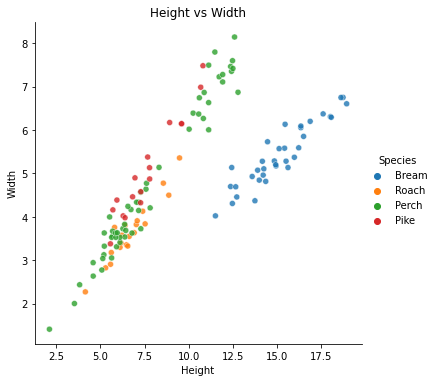

In [103]:
# finding observations
# fish.groupby(by='Species').count()
# fish should only includ Bream, Perch, Roach, Pike
import seaborn as sns

fish = fish[fish['Species'] != "Parkki"]
fish = fish[fish['Species'] != "Smelt"]
fish = fish[fish['Species'] != "Whitefish"]

sns.relplot(x="Height", y="Width", hue="Species",data=fish, alpha =.8);

plt.title('Height vs Width')
plt.ylabel('Width')
plt.xlabel('Height')
plt.show()

For the Height vs Width scatterplot
* Across all species there is a positive correlation between height and width
* For the bream species, it seems like they are taller on average and also at the higher end of the high spectrum but the postive correlation is less strong than the 3 other species.

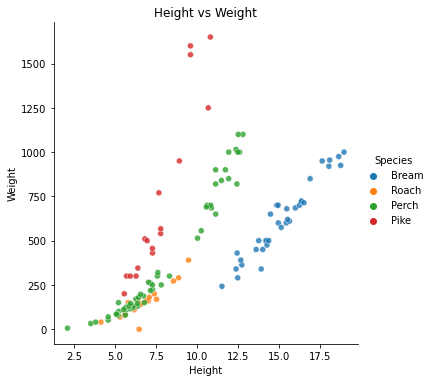

In [104]:
sns.relplot(x="Height", y="Weight", hue="Species",data=fish, alpha =.8);
plt.title('Height vs Weight')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.show()

For the Height vs Weight scatterplot
* Across all species there is a positive correlation (though less positive at lower heights and weights)
* There is an extremely steep slope for the Pike species indcating that for each unit increase of height, there is a greater increase in weight as compared to other species.

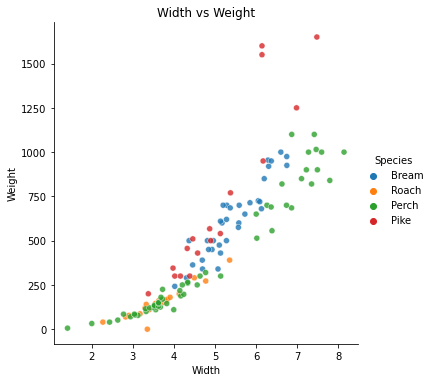

In [105]:
sns.relplot(x="Width", y="Weight", hue="Species",data=fish, alpha =.8);
plt.title('Width vs Weight')
plt.ylabel('Weight')
plt.xlabel('Width')
plt.show()

For the Width vs Weight scatterplot
* This scatterplot is the most similar across all species.
* There is a strong positive correlation although the slope is not too steep or too flat for any species/

---

## Problem 10 (6 pts)

Make a three-dimensional scatterplot to demonstrate the relationship between `Height` (x-axis), `Width` (y-axis) and `Weight` (z-axis) in one graph (again for the updated `fish` data frame). Color each point by species. Label the axes and color legend with the appropriate variable name.

Do you prefer the individual 2D scatterplots or the all-encompassing 3D graph? Why? *(Open-ended question!)*

*(Hint: Here is a [tutorial](https://pythonprogramming.net/3d-scatter-plot-customizing/) on 3D scatterplots. You don't have to use this specific method for 3D plotting.)*

---

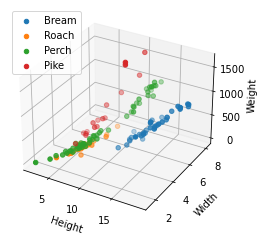

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

species = fish['Species'].unique()

for n in species:
    x = fish[fish['Species'] == n]
    ax.scatter(x['Height'], x['Width'], x['Weight'], marker = 'o', label = n)


ax.set_xlabel("Height")
ax.set_ylabel("Width")
ax.set_zlabel("Weight")

ax.legend(loc= "upper left")

plt.show()

As of right now, I definitely prefer the 2D plots, they are easier to see the relationship between two variables. In this all encompassing 3D plot, I am quite confused as to what is really happening because the relationships are getting lost in 3D space.